# Graph Analysis
### Adjacency matrix for graphs
The **adjacency matrix** is a way to represent graphs by a matrix. In fact, an adjacency matrix of a graph with $n$ nodes, is a *square matrix* of size $n\times n$. Each entry $A_{ij}$ of the adjacency matrix at row $i$ and column $j$ is the value of one if there is an edge between vertices $i$ and $j$. Otherwise, the value of the entry $A_{ij}$ is zero.
 - The above definition of values of adjacency matrices is valid for **simple graphs**. Simple graphs are graphs with no **self-loops** and no **multiple edges**. 

**Reminder 1:** A **self-loop** is an edge that connects a node to itself. Thus, it begins from a node and ends at the same node.
<br>**Reminder 2:** **Multiple edges** is when two or more edges connect the same pair of nodes (in the same direction for directed graphs).
<br> **Hint:** For undirected graphs whether simple or not, we have: $A^T=A$ (i.e., adjacency matrix $A$ is symmetric)
<hr>

In the following, we give examples of how to define adjacency matrix for different kinds of graphs:
 - Simple graphs (directed and undirected)
 - Undirected graphs with self-loops
 - Multigraphs (directed snd undirected)
 - Weighted undirected graphs
 
<hr>

https://github.com/ostad-ai/Graph-Analysis
<br>Explanation in English :https://www.pinterest.com/HamedShahHosseini/graph-analysis/

In [1]:
# Import required modules
import networkx as nx
import matplotlib.pyplot as plt

Adjacency Matrix (simple undirected):
[[0 1 1]
 [1 0 1]
 [1 1 0]]
------------------------------
Adjacency Matrix (simple directed):
[[0 1 1]
 [0 0 1]
 [0 0 0]]


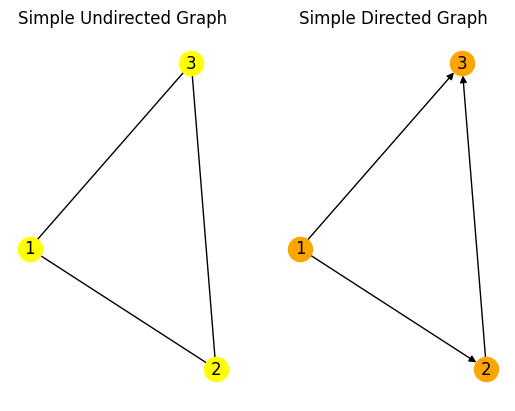

In [2]:
# Simple graphs (no self-loops and no multile edges)
# Simple undirected graph
G=nx.Graph()
edges=[('1','2'),('2','3'),('1','3')]
G.add_edges_from(edges)
A=nx.adjacency_matrix(G).todense()
print(f'Adjacency Matrix (simple undirected):\n{A}')

# Simple directed graph
G_d=nx.DiGraph()
edges_d=[('1','2'),('2','3'),('1','3')]
G_d.add_edges_from(edges_d)
A_d=nx.adjacency_matrix(G_d).todense()
print('-'*30)
print(f'Adjacency Matrix (simple directed):\n{A_d}')
pos=nx.spring_layout(G)  # Position nodes nicely
plt.subplot(121)
plt.title('Simple Undirected Graph')
nx.draw(G,pos,with_labels=True,node_color='yellow')
plt.subplot(122)
nx.draw(G_d,pos,with_labels=True,node_color='orange')
plt.title('Simple Directed Graph')
plt.show()

In [3]:
# Create an undirected graph with a self-loop
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])
G.add_edge(4, 4)  # Self-loop at vertex 4
# Adjacency matrix (Note: NetworkX counts self-loops as 1 by default)
A = nx.adjacency_matrix(G).todense()
print("Adjacency Matrix (NetworkX default):\n", A)

# Follow the A_{ii} = 2 convention
for i in range(A.shape[0]):
    A[i,i]*=2
print('-'*30)
print("Adjacency Matrix (A_{ii} = 2 for self-loops):\n", A)

Adjacency Matrix (NetworkX default):
 [[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 1]]
------------------------------
Adjacency Matrix (A_{ii} = 2 for self-loops):
 [[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 2]]


In [4]:
# Examples with multigraphs (they can have self-loops in NetworkX)

# Undirected multigraph
G_undir = nx.MultiGraph([(1, 2), (1, 2), (2, 3), (3, 3)])
A_undir = nx.adjacency_matrix(G_undir).todense()
for i in range(A_undir.shape[0]):
    A_undir[i,i]*=2
print("Undirected Multigraph:\n", A_undir)

# Directed multigraph
G_dir = nx.MultiDiGraph([(1, 2), (1, 2), (2, 3), (3, 1), (3, 3)])
A_dir = nx.adjacency_matrix(G_dir).todense()
print('-'*20)
print("Directed Multigraph:\n", A_dir)

Undirected Multigraph:
 [[0 2 0]
 [2 0 1]
 [0 1 2]]
--------------------
Directed Multigraph:
 [[0 2 0]
 [0 0 1]
 [1 0 1]]


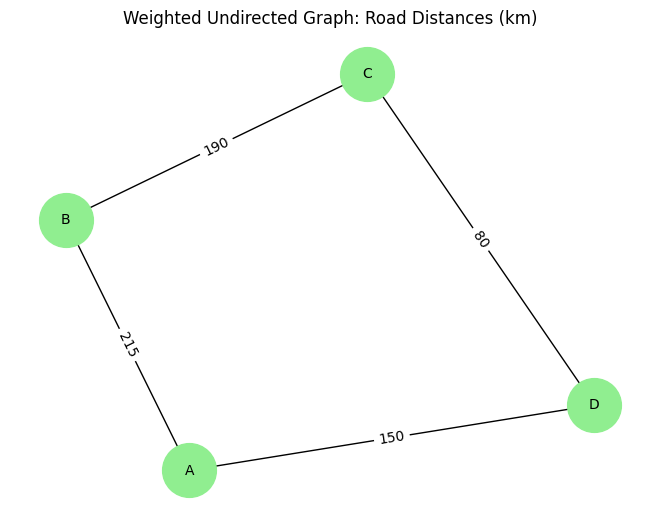

In [5]:
# Example for weighted graphs
# A weighted graph has weights on edges

# Create a weighted undirected graph
Gw = nx.Graph()

# Add weighted edges: (node1, node2, weight)
Gw.add_edge("A", "B", weight=215)     # km
Gw.add_edge("B", "C", weight=190)
Gw.add_edge("A", "D", weight=150)
Gw.add_edge("C", "D", weight=80)

# Draw with edge labels
pos = nx.spring_layout(Gw)  # Position nodes nicely
nx.draw(Gw, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10)
labels = nx.get_edge_attributes(Gw, 'weight')
nx.draw_networkx_edge_labels(Gw, pos, edge_labels=labels)

plt.title("Weighted Undirected Graph: Road Distances (km)")
plt.show()